In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

plt.style.use("ggplot")

In [6]:
import matplotlib.font_manager as fm
import matplotlib
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

#  한글글꼴로 변경
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

### crime_in_Seoul.csv
    1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시요
    2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요
    3. 절도검거율 컬럼을 추가 하시요
    4. 폭력발생 top5를 구하시요( 관서명, 폭력발생, 폭력검거)
    5. 상관관계 heatmap을 그리시요
    6. 살인발생과 폭력발생 (1:1) 의 상관관계를 확인하고
    살인 발생이 5건인경우 폭력발생수를 예측하시요
    (텐서버전, 케라스버전)

In [28]:
cr = pd.read_csv('data/crime_in_Seoul.csv', encoding='euc-kr', 
                 thousands = ',', index_col = '관서명') #천단위 쉼표 제거
cr

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170
종로서,3,3,6,5,115,98,1070,413,1278,1070
남대문서,1,0,6,4,65,46,1153,382,869,794
서대문서,2,2,5,4,154,124,1812,738,2056,1711
혜화서,3,2,5,4,96,63,1114,424,1015,861
용산서,5,5,14,14,194,173,1557,587,2050,1704
성북서,2,2,2,1,86,71,953,409,1194,1015
동대문서,5,5,13,13,173,146,1981,814,2548,2227
마포서,8,8,14,10,294,247,2555,813,2983,2519


In [29]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 중부서 to 수서서
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   살인 발생   31 non-null     int64
 1   살인 검거   31 non-null     int64
 2   강도 발생   31 non-null     int64
 3   강도 검거   31 non-null     int64
 4   강간 발생   31 non-null     int64
 5   강간 검거   31 non-null     int64
 6   절도 발생   31 non-null     int64
 7   절도 검거   31 non-null     int64
 8   폭력 발생   31 non-null     int64
 9   폭력 검거   31 non-null     int64
dtypes: int64(10)
memory usage: 2.7+ KB


In [40]:
#1. 살인 발생이 가장 높은 관서명, 살인 발생,살인 검거 출력
cr.nlargest(1, '살인 발생', keep='all')[['살인 발생', '살인 검거']]

,살인 발생,살인 검거
관서명,,
영등포서,14,12


### nlargest 익히기

In [32]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,50,70]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,50
d,70,80,70


In [36]:
df.nlargest(3, 'math', keep='all') #동점인 경우 default는 먼저 선언된 1개만 출력 / first,last,all

,eng,kor,math
a,10,20,90
d,70,80,70
b,30,40,50
c,50,60,50


In [38]:
df.nsmallest(1, 'math')

,eng,kor,math
b,30,40,50


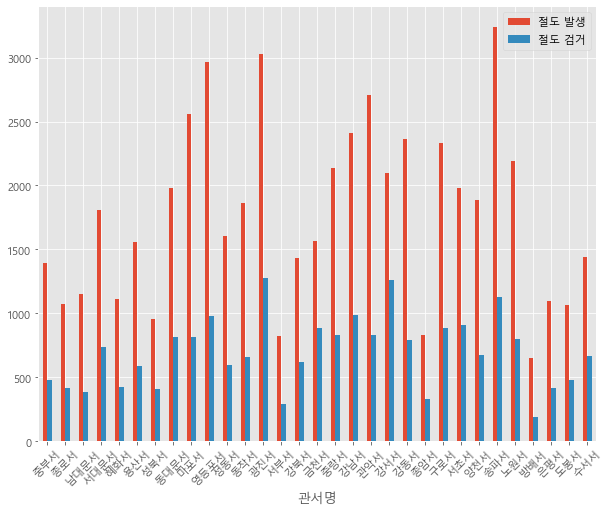

In [43]:
#2. 관서별 절도발생, 절도검거에 대한 바차트를 그리시요
cr.plot(kind='bar', y=['절도 발생', '절도 검거'], figsize= (10,8), rot=45); #stacked=True : 누적형
plt.show()

In [44]:
# 3. 절도검거율 컬럼 추가
cr.insert(7, '절도검거율1', cr['절도 검거']/cr['절도 발생']) #7번째 열에 추가
cr.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도검거율1,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,0.341935,477,1355,1170
종로서,3,3,6,5,115,98,1070,0.385981,413,1278,1070
남대문서,1,0,6,4,65,46,1153,0.331310,382,869,794
서대문서,2,2,5,4,154,124,1812,0.407285,738,2056,1711
혜화서,3,2,5,4,96,63,1114,0.380610,424,1015,861


In [49]:
cr.round(2)

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도검거율1,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,0.34,477,1355,1170
종로서,3,3,6,5,115,98,1070,0.39,413,1278,1070
남대문서,1,0,6,4,65,46,1153,0.33,382,869,794
서대문서,2,2,5,4,154,124,1812,0.41,738,2056,1711
혜화서,3,2,5,4,96,63,1114,0.38,424,1015,861
용산서,5,5,14,14,194,173,1557,0.38,587,2050,1704
성북서,2,2,2,1,86,71,953,0.43,409,1194,1015
동대문서,5,5,13,13,173,146,1981,0.41,814,2548,2227
마포서,8,8,14,10,294,247,2555,0.32,813,2983,2519


In [47]:
# 4. 폭력발생 top5를 구하시요( 관서명, 폭력발생, 폭력검거)
cr.nlargest(5, '폭력 발생', keep='all')[['폭력 발생', '폭력 검거']]

,폭력 발생,폭력 검거
관서명,,
영등포서,3572,2961
관악서,3298,2642
송파서,3295,2786
강서서,3207,2718
구로서,3007,2432


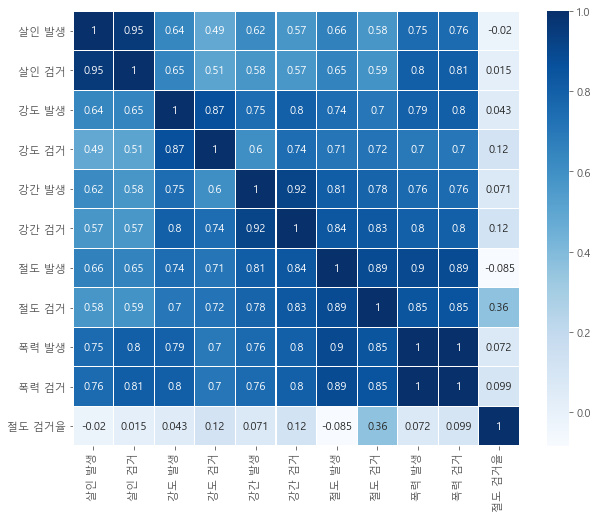

In [13]:
# 5. 상관관계 heatmap을 그리시요
plt.figure(figsize = (10, 8))
sb.heatmap(cr.corr(), annot=True, linewidths=0.2, cmap = 'Blues')
plt.show()

In [26]:
# 6. 살인발생과 폭력발생 (1:1) 의 상관관계를 확인하고 
# 살인 발생이 5건인경우 폭력발생수를 예측하시요 (텐서버전, 케라스버전)
cr[['살인 발생', '폭력 발생']].corr()

,살인 발생,폭력 발생
살인 발생,1.000000,0.754575
폭력 발생,0.754575,1.000000


#### 텐서 버전

In [16]:
x_data =cr['살인 발생']
y_data = cr['폭력 발생']

In [17]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))

In [18]:
def compute_loss():
    hx = x*w + b #tf.matmul(x,w) + b
    cost = tf.reduce_mean((hx-y)**2)
    return cost

In [19]:
optimizer = Adam(learning_rate=0.1)
for i in range(5000):
    optimizer.minimize(compute_loss, var_list=[w,b])

In [20]:
def hxFn(xdata):
    hx = w*xdata + b
    return hx.numpy()

In [21]:
print(hxFn([[5]]))

[[1757.3738]]


#### 케라스 버전

In [22]:
dense = Dense( units=1, input_dim=1 )
model = Sequential([dense])
model.compile(loss='mse', optimizer=Adam(0.1))
h = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 210ms/step - loss: 5131494.0000
Epoch 2/5000
1/1 [==============================] - 0s 998us/step - loss: 5128411.0000
Epoch 3/5000
1/1 [==============================] - 0s 997us/step - loss: 5125328.5000
Epoch 4/5000
1/1 [==============================] - 0s 997us/step - loss: 5122247.5000
Epoch 5/5000
1/1 [==============================] - 0s 998us/step - loss: 5119168.0000
Epoch 6/5000
1/1 [==============================] - 0s 997us/step - loss: 5116089.5000
Epoch 7/5000
1/1 [==============================] - 0s 998us/step - loss: 5113011.5000
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 5109935.5000
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 5106860.0000
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 5103786.5000
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 5100713.0000
Epoch 12/5000
1/1 [==============================

1/1 [==============================] - 0s 1ms/step - loss: 4847687.0000
Epoch 96/5000
1/1 [==============================] - 0s 2ms/step - loss: 4844739.5000
Epoch 97/5000
1/1 [==============================] - 0s 2ms/step - loss: 4841792.0000
Epoch 98/5000
1/1 [==============================] - 0s 997us/step - loss: 4838847.0000
Epoch 99/5000
1/1 [==============================] - 0s 2ms/step - loss: 4835903.0000
Epoch 100/5000
1/1 [==============================] - 0s 998us/step - loss: 4832960.0000
Epoch 101/5000
1/1 [==============================] - 0s 997us/step - loss: 4830019.0000
Epoch 102/5000
1/1 [==============================] - 0s 2ms/step - loss: 4827079.5000
Epoch 103/5000
1/1 [==============================] - 0s 997us/step - loss: 4824142.0000
Epoch 104/5000
1/1 [==============================] - 0s 997us/step - loss: 4821205.5000
Epoch 105/5000
1/1 [==============================] - 0s 998us/step - loss: 4818270.5000
Epoch 106/5000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 4579835.0000
Epoch 189/5000
1/1 [==============================] - 0s 2ms/step - loss: 4577023.5000
Epoch 190/5000
1/1 [==============================] - 0s 998us/step - loss: 4574213.5000
Epoch 191/5000
1/1 [==============================] - 0s 2ms/step - loss: 4571405.5000
Epoch 192/5000
1/1 [==============================] - 0s 998us/step - loss: 4568598.5000
Epoch 193/5000
1/1 [==============================] - 0s 997us/step - loss: 4565793.5000
Epoch 194/5000
1/1 [==============================] - 0s 997us/step - loss: 4562989.5000
Epoch 195/5000
1/1 [==============================] - 0s 2ms/step - loss: 4560187.5000
Epoch 196/5000
1/1 [==============================] - 0s 998us/step - loss: 4557386.0000
Epoch 197/5000
1/1 [==============================] - 0s 998us/step - loss: 4554586.5000
Epoch 198/5000
1/1 [==============================] - 0s 2ms/step - loss: 4551788.5000
Epoch 199/5000
1/1 [==========================

1/1 [==============================] - 0s 1ms/step - loss: 4324529.0000
Epoch 282/5000
1/1 [==============================] - 0s 997us/step - loss: 4321850.5000
Epoch 283/5000
1/1 [==============================] - 0s 991us/step - loss: 4319173.0000
Epoch 284/5000
1/1 [==============================] - 0s 997us/step - loss: 4316497.5000
Epoch 285/5000
1/1 [==============================] - 0s 997us/step - loss: 4313822.5000
Epoch 286/5000
1/1 [==============================] - 0s 2ms/step - loss: 4311150.0000
Epoch 287/5000
1/1 [==============================] - 0s 2ms/step - loss: 4308478.0000
Epoch 288/5000
1/1 [==============================] - 0s 998us/step - loss: 4305807.5000
Epoch 289/5000
1/1 [==============================] - 0s 998us/step - loss: 4303139.0000
Epoch 290/5000
1/1 [==============================] - 0s 998us/step - loss: 4300471.5000
Epoch 291/5000
1/1 [==============================] - 0s 2ms/step - loss: 4297805.5000
Epoch 292/5000
1/1 [========================

Epoch 374/5000
1/1 [==============================] - 0s 997us/step - loss: 4081327.0000
Epoch 375/5000
1/1 [==============================] - 0s 997us/step - loss: 4078776.2500
Epoch 376/5000
1/1 [==============================] - 0s 997us/step - loss: 4076226.2500
Epoch 377/5000
1/1 [==============================] - 0s 997us/step - loss: 4073678.5000
Epoch 378/5000
1/1 [==============================] - 0s 2ms/step - loss: 4071131.5000
Epoch 379/5000
1/1 [==============================] - 0s 997us/step - loss: 4068585.7500
Epoch 380/5000
1/1 [==============================] - 0s 2ms/step - loss: 4066041.7500
Epoch 381/5000
1/1 [==============================] - 0s 2ms/step - loss: 4063499.0000
Epoch 382/5000
1/1 [==============================] - 0s 1ms/step - loss: 4060957.7500
Epoch 383/5000
1/1 [==============================] - 0s 2ms/step - loss: 4058417.7500
Epoch 384/5000
1/1 [==============================] - 0s 997us/step - loss: 4055878.7500
Epoch 385/5000
1/1 [===========

1/1 [==============================] - 0s 997us/step - loss: 3634161.5000
Epoch 559/5000
1/1 [==============================] - 0s 998us/step - loss: 3631850.5000
Epoch 560/5000
1/1 [==============================] - 0s 997us/step - loss: 3629540.7500
Epoch 561/5000
1/1 [==============================] - 0s 998us/step - loss: 3627232.0000
Epoch 562/5000
1/1 [==============================] - 0s 997us/step - loss: 3624925.0000
Epoch 563/5000
1/1 [==============================] - 0s 997us/step - loss: 3622618.2500
Epoch 564/5000
1/1 [==============================] - 0s 997us/step - loss: 3620314.0000
Epoch 565/5000
1/1 [==============================] - 0s 998us/step - loss: 3618010.2500
Epoch 566/5000
1/1 [==============================] - 0s 998us/step - loss: 3615707.7500
Epoch 567/5000
1/1 [==============================] - 0s 2ms/step - loss: 3613406.7500
Epoch 568/5000
1/1 [==============================] - 0s 998us/step - loss: 3611106.5000
Epoch 569/5000
1/1 [==================

1/1 [==============================] - 0s 998us/step - loss: 3229592.5000
Epoch 743/5000
1/1 [==============================] - 0s 998us/step - loss: 3227504.7500
Epoch 744/5000
1/1 [==============================] - 0s 997us/step - loss: 3225418.0000
Epoch 745/5000
1/1 [==============================] - 0s 2ms/step - loss: 3223332.7500
Epoch 746/5000
1/1 [==============================] - 0s 2ms/step - loss: 3221248.2500
Epoch 747/5000
1/1 [==============================] - 0s 997us/step - loss: 3219165.5000
Epoch 748/5000
1/1 [==============================] - 0s 2ms/step - loss: 3217083.2500
Epoch 749/5000
1/1 [==============================] - 0s 2ms/step - loss: 3215002.5000
Epoch 750/5000
1/1 [==============================] - 0s 997us/step - loss: 3212923.0000
Epoch 751/5000
1/1 [==============================] - 0s 2ms/step - loss: 3210844.7500
Epoch 752/5000
1/1 [==============================] - 0s 2ms/step - loss: 3208768.0000
Epoch 753/5000
1/1 [============================

1/1 [==============================] - 0s 997us/step - loss: 2864715.0000
Epoch 927/5000
1/1 [==============================] - 0s 2ms/step - loss: 2862835.2500
Epoch 928/5000
1/1 [==============================] - 0s 997us/step - loss: 2860957.0000
Epoch 929/5000
1/1 [==============================] - 0s 2ms/step - loss: 2859079.5000
Epoch 930/5000
1/1 [==============================] - 0s 2ms/step - loss: 2857203.0000
Epoch 931/5000
1/1 [==============================] - 0s 2ms/step - loss: 2855328.0000
Epoch 932/5000
1/1 [==============================] - 0s 2ms/step - loss: 2853454.0000
Epoch 933/5000
1/1 [==============================] - 0s 2ms/step - loss: 2851581.0000
Epoch 934/5000
1/1 [==============================] - 0s 997us/step - loss: 2849709.0000
Epoch 935/5000
1/1 [==============================] - 0s 2ms/step - loss: 2847838.2500
Epoch 936/5000
1/1 [==============================] - 0s 2ms/step - loss: 2845968.2500
Epoch 937/5000
1/1 [==============================] 

1/1 [==============================] - 0s 997us/step - loss: 2538506.2500
Epoch 1110/5000
1/1 [==============================] - 0s 997us/step - loss: 2536819.7500
Epoch 1111/5000
1/1 [==============================] - 0s 997us/step - loss: 2535134.0000
Epoch 1112/5000
1/1 [==============================] - 0s 997us/step - loss: 2533449.2500
Epoch 1113/5000
1/1 [==============================] - 0s 997us/step - loss: 2531766.0000
Epoch 1114/5000
1/1 [==============================] - 0s 1ms/step - loss: 2530083.0000
Epoch 1115/5000
1/1 [==============================] - 0s 998us/step - loss: 2528401.2500
Epoch 1116/5000
1/1 [==============================] - 0s 998us/step - loss: 2526721.0000
Epoch 1117/5000
1/1 [==============================] - 0s 2ms/step - loss: 2525041.2500
Epoch 1118/5000
1/1 [==============================] - 0s 2ms/step - loss: 2523362.7500
Epoch 1119/5000
1/1 [==============================] - 0s 997us/step - loss: 2521685.2500
Epoch 1120/5000
1/1 [===========

1/1 [==============================] - 0s 997us/step - loss: 2247889.5000
Epoch 1292/5000
1/1 [==============================] - 0s 998us/step - loss: 2246381.5000
Epoch 1293/5000
1/1 [==============================] - 0s 2ms/step - loss: 2244874.2500
Epoch 1294/5000
1/1 [==============================] - 0s 2ms/step - loss: 2243368.5000
Epoch 1295/5000
1/1 [==============================] - 0s 998us/step - loss: 2241863.2500
Epoch 1296/5000
1/1 [==============================] - 0s 2ms/step - loss: 2240358.7500
Epoch 1297/5000
1/1 [==============================] - 0s 2ms/step - loss: 2238855.7500
Epoch 1298/5000
1/1 [==============================] - 0s 2ms/step - loss: 2237353.2500
Epoch 1299/5000
1/1 [==============================] - 0s 2ms/step - loss: 2235851.7500
Epoch 1300/5000
1/1 [==============================] - 0s 997us/step - loss: 2234351.5000
Epoch 1301/5000
1/1 [==============================] - 0s 2ms/step - loss: 2232851.7500
Epoch 1302/5000
1/1 [===================

1/1 [==============================] - 0s 997us/step - loss: 2113071.2500
Epoch 1384/5000
1/1 [==============================] - 0s 997us/step - loss: 2111648.7500
Epoch 1385/5000
1/1 [==============================] - 0s 998us/step - loss: 2110227.2500
Epoch 1386/5000
1/1 [==============================] - 0s 997us/step - loss: 2108806.7500
Epoch 1387/5000
1/1 [==============================] - 0s 998us/step - loss: 2107387.0000
Epoch 1388/5000
1/1 [==============================] - 0s 994us/step - loss: 2105968.2500
Epoch 1389/5000
1/1 [==============================] - 0s 2ms/step - loss: 2104550.7500
Epoch 1390/5000
1/1 [==============================] - 0s 2ms/step - loss: 2103133.7500
Epoch 1391/5000
1/1 [==============================] - 0s 2ms/step - loss: 2101717.7500
Epoch 1392/5000
1/1 [==============================] - 0s 997us/step - loss: 2100302.5000
Epoch 1393/5000
1/1 [==============================] - 0s 998us/step - loss: 2098888.2500
Epoch 1394/5000
1/1 [===========

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1885/5000
1/1 [==============================] - 0s 0s/step - loss: 1506506.7500
Epoch 1886/5000
1/1 [==============================] - 0s 1ms/step - loss: 1505499.1250
Epoch 1887/5000
1/1 [==============================] - 0s 2ms/step - loss: 1504492.2500
Epoch 1888/5000
1/1 [==============================] - 0s 2ms/step - loss: 1503485.8750
Epoch 1889/5000
1/1 [==============================] - 0s 997us/step - loss: 1502480.6250
Epoch 1890/5000
1/1 [==============================] - 0s 1ms/step - loss: 1501476.0000
Epoch 1891/5000
1/1 [==============================] - 0s 997us/step - loss: 1500471.7500
Epoch 1892/5000
1/1 [==============================] - 0s 2ms/step - loss: 1499468.6250
Epoch 1893/5000
1/1 [==============================] - 0s 997us/step - loss: 1498466.1250
Epoch 1894/5000
1/1 [==============================] - 0s 998us/step - loss: 1497464.5000
Epoch 1895/5000
1/1 [==============================] - 0s 997us/step - loss: 1496463.5000
Epoch 1896/5000
1/1 [==

1/1 [==============================] - 0s 2ms/step - loss: 1335012.6250
Epoch 2068/5000
1/1 [==============================] - 0s 997us/step - loss: 1334134.8750
Epoch 2069/5000
1/1 [==============================] - 0s 997us/step - loss: 1333257.5000
Epoch 2070/5000
1/1 [==============================] - 0s 998us/step - loss: 1332380.8750
Epoch 2071/5000
1/1 [==============================] - 0s 997us/step - loss: 1331504.8750
Epoch 2072/5000
1/1 [==============================] - 0s 998us/step - loss: 1330629.8750
Epoch 2073/5000
1/1 [==============================] - 0s 997us/step - loss: 1329755.5000
Epoch 2074/5000
1/1 [==============================] - 0s 998us/step - loss: 1328881.5000
Epoch 2075/5000
1/1 [==============================] - 0s 998us/step - loss: 1328008.5000
Epoch 2076/5000
1/1 [==============================] - 0s 997us/step - loss: 1327136.0000
Epoch 2077/5000
1/1 [==============================] - 0s 2ms/step - loss: 1326264.1250
Epoch 2078/5000
1/1 [=========

1/1 [==============================] - 0s 998us/step - loss: 1186191.3750
Epoch 2250/5000
1/1 [==============================] - 0s 998us/step - loss: 1185432.7500
Epoch 2251/5000
1/1 [==============================] - 0s 2ms/step - loss: 1184675.0000
Epoch 2252/5000
1/1 [==============================] - 0s 998us/step - loss: 1183917.5000
Epoch 2253/5000
1/1 [==============================] - 0s 998us/step - loss: 1183160.7500
Epoch 2254/5000
1/1 [==============================] - 0s 998us/step - loss: 1182405.0000
Epoch 2255/5000
1/1 [==============================] - 0s 998us/step - loss: 1181649.5000
Epoch 2256/5000
1/1 [==============================] - 0s 997us/step - loss: 1180894.8750
Epoch 2257/5000
1/1 [==============================] - 0s 998us/step - loss: 1180140.6250
Epoch 2258/5000
1/1 [==============================] - 0s 997us/step - loss: 1179387.1250
Epoch 2259/5000
1/1 [==============================] - 0s 975us/step - loss: 1178634.2500
Epoch 2260/5000
1/1 [=======

1/1 [==============================] - 0s 998us/step - loss: 1058175.3750
Epoch 2432/5000
1/1 [==============================] - 0s 997us/step - loss: 1057526.2500
Epoch 2433/5000
1/1 [==============================] - 0s 998us/step - loss: 1056877.5000
Epoch 2434/5000
1/1 [==============================] - 0s 997us/step - loss: 1056229.2500
Epoch 2435/5000
1/1 [==============================] - 0s 998us/step - loss: 1055581.6250
Epoch 2436/5000
1/1 [==============================] - 0s 997us/step - loss: 1054934.7500
Epoch 2437/5000
1/1 [==============================] - 0s 997us/step - loss: 1054288.3750
Epoch 2438/5000
1/1 [==============================] - 0s 1ms/step - loss: 1053642.6250
Epoch 2439/5000
1/1 [==============================] - 0s 998us/step - loss: 1052997.1250
Epoch 2440/5000
1/1 [==============================] - 0s 998us/step - loss: 1052352.3750
Epoch 2441/5000
1/1 [==============================] - 0s 2ms/step - loss: 1051708.1250
Epoch 2442/5000
1/1 [=========

1/1 [==============================] - 0s 997us/step - loss: 948589.6250
Epoch 2615/5000
1/1 [==============================] - 0s 998us/step - loss: 948040.1250
Epoch 2616/5000
1/1 [==============================] - 0s 2ms/step - loss: 947491.1875
Epoch 2617/5000
1/1 [==============================] - 0s 2ms/step - loss: 946942.8125
Epoch 2618/5000
1/1 [==============================] - 0s 998us/step - loss: 946394.7500
Epoch 2619/5000
1/1 [==============================] - 0s 997us/step - loss: 945847.3750
Epoch 2620/5000
1/1 [==============================] - 0s 998us/step - loss: 945300.5625
Epoch 2621/5000
1/1 [==============================] - 0s 1ms/step - loss: 944754.1250
Epoch 2622/5000
1/1 [==============================] - 0s 998us/step - loss: 944208.2500
Epoch 2623/5000
1/1 [==============================] - 0s 980us/step - loss: 943662.9375
Epoch 2624/5000
1/1 [==============================] - 0s 2ms/step - loss: 943118.1250
Epoch 2625/5000
1/1 [========================

1/1 [==============================] - 0s 2ms/step - loss: 899667.3750
Epoch 2708/5000
1/1 [==============================] - 0s 2ms/step - loss: 899164.8125
Epoch 2709/5000
1/1 [==============================] - 0s 997us/step - loss: 898662.6875
Epoch 2710/5000
1/1 [==============================] - 0s 998us/step - loss: 898161.2500
Epoch 2711/5000
1/1 [==============================] - 0s 997us/step - loss: 897660.2500
Epoch 2712/5000
1/1 [==============================] - 0s 2ms/step - loss: 897159.6250
Epoch 2713/5000
1/1 [==============================] - 0s 997us/step - loss: 896659.5625
Epoch 2714/5000
1/1 [==============================] - 0s 998us/step - loss: 896160.0625
Epoch 2715/5000
1/1 [==============================] - 0s 997us/step - loss: 895660.8750
Epoch 2716/5000
1/1 [==============================] - 0s 997us/step - loss: 895162.1875
Epoch 2717/5000
1/1 [==============================] - 0s 997us/step - loss: 894664.1250
Epoch 2718/5000
1/1 [======================

Epoch 2800/5000
1/1 [==============================] - 0s 2ms/step - loss: 854994.3750
Epoch 2801/5000
1/1 [==============================] - 0s 2ms/step - loss: 854536.1875
Epoch 2802/5000
1/1 [==============================] - 0s 998us/step - loss: 854078.5625
Epoch 2803/5000
1/1 [==============================] - 0s 998us/step - loss: 853621.4375
Epoch 2804/5000
1/1 [==============================] - 0s 998us/step - loss: 853164.6875
Epoch 2805/5000
1/1 [==============================] - 0s 2ms/step - loss: 852708.3750
Epoch 2806/5000
1/1 [==============================] - 0s 997us/step - loss: 852252.6250
Epoch 2807/5000
1/1 [==============================] - 0s 2ms/step - loss: 851797.3125
Epoch 2808/5000
1/1 [==============================] - 0s 2ms/step - loss: 851342.3750
Epoch 2809/5000
1/1 [==============================] - 0s 2ms/step - loss: 850888.0625
Epoch 2810/5000
1/1 [==============================] - 0s 2ms/step - loss: 850434.0625
Epoch 2811/5000
1/1 [==============

1/1 [==============================] - 0s 997us/step - loss: 777460.8750
Epoch 2987/5000
1/1 [==============================] - 0s 997us/step - loss: 777084.0625
Epoch 2988/5000
1/1 [==============================] - 0s 997us/step - loss: 776707.6875
Epoch 2989/5000
1/1 [==============================] - 0s 453us/step - loss: 776331.7500
Epoch 2990/5000
1/1 [==============================] - 0s 998us/step - loss: 775956.1250
Epoch 2991/5000
1/1 [==============================] - 0s 998us/step - loss: 775580.9375
Epoch 2992/5000
1/1 [==============================] - 0s 2ms/step - loss: 775206.2500
Epoch 2993/5000
1/1 [==============================] - 0s 997us/step - loss: 774831.9375
Epoch 2994/5000
1/1 [==============================] - 0s 997us/step - loss: 774458.0625
Epoch 2995/5000
1/1 [==============================] - 0s 998us/step - loss: 774084.5625
Epoch 2996/5000
1/1 [==============================] - 0s 2ms/step - loss: 773711.3125
Epoch 2997/5000
1/1 [====================

1/1 [==============================] - 0s 997us/step - loss: 714751.7500
Epoch 3171/5000
1/1 [==============================] - 0s 997us/step - loss: 714445.7500
Epoch 3172/5000
1/1 [==============================] - 0s 2ms/step - loss: 714140.0000
Epoch 3173/5000
1/1 [==============================] - 0s 998us/step - loss: 713834.7500
Epoch 3174/5000
1/1 [==============================] - 0s 998us/step - loss: 713529.7500
Epoch 3175/5000
1/1 [==============================] - 0s 997us/step - loss: 713225.2500
Epoch 3176/5000
1/1 [==============================] - 0s 997us/step - loss: 712920.9375
Epoch 3177/5000
1/1 [==============================] - 0s 998us/step - loss: 712617.0625
Epoch 3178/5000
1/1 [==============================] - 0s 997us/step - loss: 712313.5000
Epoch 3179/5000
1/1 [==============================] - 0s 998us/step - loss: 712010.4375
Epoch 3180/5000
1/1 [==============================] - 0s 997us/step - loss: 711707.5625
Epoch 3181/5000
1/1 [==================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 3710/5000
1/1 [==============================] - 0s 993us/step - loss: 594582.5625
Epoch 3711/5000
1/1 [==============================] - 0s 997us/step - loss: 594430.9375
Epoch 3712/5000
1/1 [==============================] - 0s 977us/step - loss: 594279.6875
Epoch 3713/5000
1/1 [==============================] - 0s 998us/step - loss: 594128.5000
Epoch 3714/5000
1/1 [==============================] - 0s 2ms/step - loss: 593977.5000
Epoch 3715/5000
1/1 [==============================] - 0s 997us/step - loss: 593826.6250
Epoch 3716/5000
1/1 [==============================] - 0s 998us/step - loss: 593676.2500
Epoch 3717/5000
1/1 [==============================] - 0s 998us/step - loss: 593525.8750
Epoch 3718/5000
1/1 [==============================] - 0s 2ms/step - loss: 593375.8750
Epoch 3719/5000
1/1 [==============================] - 0s 997us/step - loss: 593225.9375
Epoch 3720/5000
1/1 [==============================] - 0s 998us/step - loss: 593076.2500
Epoch 3721/5000
1/1 [====

Epoch 3803/5000
1/1 [==============================] - 0s 2ms/step - loss: 581376.1250
Epoch 3804/5000
1/1 [==============================] - 0s 2ms/step - loss: 581243.5625
Epoch 3805/5000
1/1 [==============================] - 0s 2ms/step - loss: 581111.1875
Epoch 3806/5000
1/1 [==============================] - 0s 2ms/step - loss: 580979.0625
Epoch 3807/5000
1/1 [==============================] - 0s 997us/step - loss: 580847.1250
Epoch 3808/5000
1/1 [==============================] - 0s 2ms/step - loss: 580715.3750
Epoch 3809/5000
1/1 [==============================] - 0s 2ms/step - loss: 580583.7500
Epoch 3810/5000
1/1 [==============================] - 0s 2ms/step - loss: 580452.2500
Epoch 3811/5000
1/1 [==============================] - 0s 2ms/step - loss: 580321.1875
Epoch 3812/5000
1/1 [==============================] - 0s 997us/step - loss: 580190.1875
Epoch 3813/5000
1/1 [==============================] - 0s 997us/step - loss: 580059.3125
Epoch 3814/5000
1/1 [================

1/1 [==============================] - 0s 998us/step - loss: 560015.3750
Epoch 3988/5000
1/1 [==============================] - 0s 997us/step - loss: 559914.5000
Epoch 3989/5000
1/1 [==============================] - 0s 2ms/step - loss: 559814.0000
Epoch 3990/5000
1/1 [==============================] - 0s 2ms/step - loss: 559713.5000
Epoch 3991/5000
1/1 [==============================] - 0s 997us/step - loss: 559613.2500
Epoch 3992/5000
1/1 [==============================] - 0s 998us/step - loss: 559513.1875
Epoch 3993/5000
1/1 [==============================] - 0s 997us/step - loss: 559413.1250
Epoch 3994/5000
1/1 [==============================] - 0s 2ms/step - loss: 559313.3125
Epoch 3995/5000
1/1 [==============================] - 0s 997us/step - loss: 559213.6875
Epoch 3996/5000
1/1 [==============================] - 0s 998us/step - loss: 559114.1875
Epoch 3997/5000
1/1 [==============================] - 0s 997us/step - loss: 559014.6875
Epoch 3998/5000
1/1 [======================

1/1 [==============================] - 0s 2ms/step - loss: 551271.6250
Epoch 4081/5000
1/1 [==============================] - 0s 2ms/step - loss: 551184.0625
Epoch 4082/5000
1/1 [==============================] - 0s 1ms/step - loss: 551096.8125
Epoch 4083/5000
1/1 [==============================] - 0s 998us/step - loss: 551009.6875
Epoch 4084/5000
1/1 [==============================] - 0s 997us/step - loss: 550922.5625
Epoch 4085/5000
1/1 [==============================] - 0s 2ms/step - loss: 550835.6250
Epoch 4086/5000
1/1 [==============================] - 0s 998us/step - loss: 550748.8750
Epoch 4087/5000
1/1 [==============================] - 0s 998us/step - loss: 550662.2500
Epoch 4088/5000
1/1 [==============================] - 0s 2ms/step - loss: 550575.6875
Epoch 4089/5000
1/1 [==============================] - 0s 998us/step - loss: 550489.2500
Epoch 4090/5000
1/1 [==============================] - 0s 998us/step - loss: 550403.0625
Epoch 4091/5000
1/1 [==========================

1/1 [==============================] - 0s 2ms/step - loss: 543681.5625
Epoch 4174/5000
1/1 [==============================] - 0s 998us/step - loss: 543605.5625
Epoch 4175/5000
1/1 [==============================] - 0s 997us/step - loss: 543529.6875
Epoch 4176/5000
1/1 [==============================] - 0s 2ms/step - loss: 543453.9375
Epoch 4177/5000
1/1 [==============================] - 0s 2ms/step - loss: 543378.3750
Epoch 4178/5000
1/1 [==============================] - 0s 2ms/step - loss: 543302.9375
Epoch 4179/5000
1/1 [==============================] - 0s 2ms/step - loss: 543227.6250
Epoch 4180/5000
1/1 [==============================] - 0s 998us/step - loss: 543152.3125
Epoch 4181/5000
1/1 [==============================] - 0s 2ms/step - loss: 543077.2500
Epoch 4182/5000
1/1 [==============================] - 0s 997us/step - loss: 543002.2500
Epoch 4183/5000
1/1 [==============================] - 0s 2ms/step - loss: 542927.3750
Epoch 4184/5000
1/1 [==============================

1/1 [==============================] - 0s 997us/step - loss: 531462.0000
Epoch 4358/5000
1/1 [==============================] - 0s 997us/step - loss: 531404.2500
Epoch 4359/5000
1/1 [==============================] - 0s 998us/step - loss: 531346.5000
Epoch 4360/5000
1/1 [==============================] - 0s 997us/step - loss: 531288.8750
Epoch 4361/5000
1/1 [==============================] - 0s 998us/step - loss: 531231.3750
Epoch 4362/5000
1/1 [==============================] - 0s 998us/step - loss: 531173.8750
Epoch 4363/5000
1/1 [==============================] - 0s 997us/step - loss: 531116.5000
Epoch 4364/5000
1/1 [==============================] - 0s 998us/step - loss: 531059.2500
Epoch 4365/5000
1/1 [==============================] - 0s 997us/step - loss: 531002.1250
Epoch 4366/5000
1/1 [==============================] - 0s 998us/step - loss: 530944.9375
Epoch 4367/5000
1/1 [==============================] - 0s 997us/step - loss: 530887.8125
Epoch 4368/5000
1/1 [================

Epoch 4450/5000
1/1 [==============================] - 0s 2ms/step - loss: 526423.5000
Epoch 4451/5000
1/1 [==============================] - 0s 2ms/step - loss: 526372.7500
Epoch 4452/5000
1/1 [==============================] - 0s 997us/step - loss: 526322.1250
Epoch 4453/5000
1/1 [==============================] - 0s 997us/step - loss: 526271.5000
Epoch 4454/5000
1/1 [==============================] - 0s 997us/step - loss: 526221.0625
Epoch 4455/5000
1/1 [==============================] - 0s 998us/step - loss: 526170.5625
Epoch 4456/5000
1/1 [==============================] - 0s 997us/step - loss: 526120.1875
Epoch 4457/5000
1/1 [==============================] - 0s 998us/step - loss: 526069.8125
Epoch 4458/5000
1/1 [==============================] - 0s 997us/step - loss: 526019.6250
Epoch 4459/5000
1/1 [==============================] - 0s 998us/step - loss: 525969.5000
Epoch 4460/5000
1/1 [==============================] - 0s 998us/step - loss: 525919.3750
Epoch 4461/5000
1/1 [====

1/1 [==============================] - 0s 2ms/step - loss: 518112.1250
Epoch 4635/5000
1/1 [==============================] - 0s 2ms/step - loss: 518071.8750
Epoch 4636/5000
1/1 [==============================] - 0s 2ms/step - loss: 518031.5938
Epoch 4637/5000
1/1 [==============================] - 0s 2ms/step - loss: 517991.3750
Epoch 4638/5000
1/1 [==============================] - 0s 2ms/step - loss: 517951.2188
Epoch 4639/5000
1/1 [==============================] - 0s 2ms/step - loss: 517911.1250
Epoch 4640/5000
1/1 [==============================] - 0s 2ms/step - loss: 517871.0312
Epoch 4641/5000
1/1 [==============================] - 0s 998us/step - loss: 517831.0312
Epoch 4642/5000
1/1 [==============================] - 0s 997us/step - loss: 517791.0938
Epoch 4643/5000
1/1 [==============================] - 0s 2ms/step - loss: 517751.2188
Epoch 4644/5000
1/1 [==============================] - 0s 2ms/step - loss: 517711.3438
Epoch 4645/5000
1/1 [==============================] - 

Epoch 4727/5000
1/1 [==============================] - 0s 997us/step - loss: 514544.7500
Epoch 4728/5000
1/1 [==============================] - 0s 2ms/step - loss: 514508.1250
Epoch 4729/5000
1/1 [==============================] - 0s 2ms/step - loss: 514471.6562
Epoch 4730/5000
1/1 [==============================] - 0s 2ms/step - loss: 514435.1875
Epoch 4731/5000
1/1 [==============================] - 0s 2ms/step - loss: 514398.7188
Epoch 4732/5000
1/1 [==============================] - 0s 998us/step - loss: 514362.3125
Epoch 4733/5000
1/1 [==============================] - 0s 997us/step - loss: 514326.0000
Epoch 4734/5000
1/1 [==============================] - 0s 998us/step - loss: 514289.6875
Epoch 4735/5000
1/1 [==============================] - 0s 2ms/step - loss: 514253.3438
Epoch 4736/5000
1/1 [==============================] - 0s 998us/step - loss: 514217.1250
Epoch 4737/5000
1/1 [==============================] - 0s 2ms/step - loss: 514180.8750
Epoch 4738/5000
1/1 [============

Epoch 4912/5000
1/1 [==============================] - 0s 997us/step - loss: 508291.4062
Epoch 4913/5000
1/1 [==============================] - 0s 2ms/step - loss: 508259.9062
Epoch 4914/5000
1/1 [==============================] - 0s 997us/step - loss: 508228.3750
Epoch 4915/5000
1/1 [==============================] - 0s 997us/step - loss: 508196.9375
Epoch 4916/5000
1/1 [==============================] - 0s 998us/step - loss: 508165.4688
Epoch 4917/5000
1/1 [==============================] - 0s 997us/step - loss: 508134.0625
Epoch 4918/5000
1/1 [==============================] - 0s 998us/step - loss: 508102.6562
Epoch 4919/5000
1/1 [==============================] - 0s 998us/step - loss: 508071.2500
Epoch 4920/5000
1/1 [==============================] - 0s 997us/step - loss: 508039.9062
Epoch 4921/5000
1/1 [==============================] - 0s 2ms/step - loss: 508008.5625
Epoch 4922/5000
1/1 [==============================] - 0s 997us/step - loss: 507977.1875
Epoch 4923/5000
1/1 [====

In [23]:
model.predict([5])

array([[1755.8943]], dtype=float32)